# Feb Week1: Word Embeeding & Cosine Similarity
1. Collect a large continues text about ~800-900 sentences.
2. Load a LLM model of your preference
3. Use the sentence transformer to compute the Embedding vector of these sentences.
4. Now using these Embedding vectors compute the inter vector Cosine similarity
5. Now assuming the similarity of 0.90 and above as similar sentences, count the number of these similar sentences. Alert, since counting can occur in different ways, do not count a particular word more than once. Add the number of words on each group as a sanity check.
6. Save the count in a vector. Rearrange them, and plot the count in y-axis and matrix index in the x-axis.
7. Also plot the log log plot using the count matrix.

## Data Load

In [ ]:
# use wikipedia dataset
import json

filename = "/content/wikipedia_1000_sentences.json"
with open(filename, "r", encoding="utf-8") as f:
  sentences = json.load(f)

print(sentences)

['Anarchism is a political philosophy and movement that is skeptical of all justifications for authority and seeks to abolish the institutions it claims maintain unnecessary coercion and hierarchy, typically including nation-states, and capitalism.', 'Anarchism advocates for the replacement of the state with stateless societies and voluntary free associations.', 'As a historically left-wing movement, this reading of anarchism is placed on the farthest left of the political spectrum, usually described as the libertarian wing of the socialist movement (libertarian socialism).', 'Humans have lived in societies without formal hierarchies long before the establishment of states, realms, or empires.', 'With the rise of organised hierarchical bodies, scepticism toward authority also rose.', 'Although traces of anarchist ideas are found all throughout history, modern anarchism emerged from the Enlightenment.', "During the latter half of the 19th and the first decades of the 20th century, the a

In [ ]:
# use bookcorpus dataset
import json

filename = "/content/bookcorpus_1000_sentences.json"
with open(filename, "r", encoding="utf-8") as f:
  sentences = json.load(f)

print(sentences)

FileNotFoundError: [Errno 2] No such file or directory: '/content/bookcorpus_1000_sentences.json'

## Load LLM models & Compute Embedding Vectors

In [ ]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
from sentence_transformers import SentenceTransformer

# load embedding model (LLM)
model1 = SentenceTransformer("all-MiniLM-L6-v2") # SLM
model2 = SentenceTransformer("sentence-transformers/all-mpnet-base-v2") # sentence bert

def get_embedding(model, sentences):
  embeddings = model.encode(sentences)
  return embeddings

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings1 = get_embedding(model1, sentences)
embeddings2 = get_embedding(model2, sentences)

## compute the inter vector Cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

cos_similar1 = cosine_similarity(embeddings1)
cos_similar2 = cosine_similarity(embeddings2)

In [ ]:
print("MiniLM Cosine Similarity")
print(np.round(cos_similar1[:5, :5], 2))

MiniLM Cosine Similarity
[[1.   0.71 0.68 0.35 0.47]
 [0.71 1.   0.49 0.44 0.36]
 [0.68 0.49 1.   0.21 0.31]
 [0.35 0.44 0.21 1.   0.4 ]
 [0.47 0.36 0.31 0.4  1.  ]]


In [ ]:
print("SBert Cosine Similarity")
print(np.round(cos_similar2[:5, :5], 2))

SBert Cosine Similarity
[[1.   0.8  0.68 0.3  0.32]
 [0.8  1.   0.58 0.32 0.2 ]
 [0.68 0.58 1.   0.2  0.19]
 [0.3  0.32 0.2  1.   0.49]
 [0.32 0.2  0.19 0.49 1.  ]]


## Count the number of similar sentences & Save the count in a vector
### Grouping
- Now assuming the similarity of 0.90 and above as similar sentences, count the number of these similar sentences. Alert, since counting can occur in different ways, do not count a particular word more than once. Add the number of words on each group as a sanity check.
- Save the count in a vector

In [ ]:
n = len(sentences)
thres = 0.65

In [ ]:
def grouping(cos_similar, n, thres):
  groups = []
  visited = set()

  for i in range(n):
    if i in visited:
      continue

    group = [i]
    visited.add(i)

    for j in range(i+1, n):
      if cos_similar[i][j] >= thres:
        group.append(j)
        visited.add(j)

    groups.append(group)

  return groups

In [ ]:
group1 = grouping(cos_similar1, n, thres)
group2 = grouping(cos_similar2, n, thres)

In [ ]:
print("The number of group1:", len(group1))
print("The number of group2:", len(group2))

The number of group1: 740
The number of group2: 654


In [ ]:
# graph-based grouping (connected componenets) - clustering
import networkx as nx

def graph_based_grouping(cos_similar, n, thres):
  graph = nx.Graph()

  graph.add_nodes_from(range(n))

  for i in range(n):
    for j in range(i+1, n):
      if cos_similar[i][j] >= thres:
        graph.add_edge(i, j)

  groups = [list(component) for component in nx.connected_components(graph)]

  return groups

In [ ]:
graph_group1 = graph_based_grouping(cos_similar1, n, thres)
graph_group2 = graph_based_grouping(cos_similar2, n, thres)

print("The number of group1:", len(graph_group1))
print("The number of group2:", len(graph_group2))

The number of group1: 604
The number of group2: 450


In [ ]:
from sklearn.cluster import DBSCAN

def clustering_grouping(embedding, thres):
  eps = 1 - thres
  clustering = DBSCAN(eps=eps, min_samples=2, metric="cosine").fit(embedding)
  labels = clustering.labels_

  # print("The number of clusters:", len(set(labels))-(1 if -1 in labels else 0))

  groups = {}
  for idx, label in enumerate(labels):
    if label not in groups:
      groups[label] = []
    groups[label].append(idx)
  return list(groups.values())

In [ ]:
dbscan_group1 = clustering_grouping(embeddings1, thres)
dbscan_group2 = clustering_grouping(embeddings2, thres)

print("The number of group1:", len(dbscan_group1))
print("The number of group2:", len(dbscan_group2))

The number of group1: 65
The number of group2: 47


### Counting algorithms

In [ ]:
def get_count(groups):
  group_counts = []
  word_counts = []

  for group in groups:
    group_counts.append(len(group))

    unique_words = set() # prevent duplicates
    for idx in group:
      unique_words.update(sentences[idx].split())
    word_counts.append(len(unique_words))
  return group_counts, word_counts # num of sentence per group, num of word per group

variable name:
  - group1: using greedy algorithm
  - graph_group1: graph-based grouping
  - dbscan_group1: dbscan clustering

In [ ]:
print("--Greedy Grouping--")

group_counts1, word_counts1 = get_count(group1)
group_counts2, word_counts2 = get_count(group2)

print("Embedding 1")
print("Group Counts of first 5th group:", group_counts1[:5])
print("Word Counts of first 5th group:", word_counts1[:5])

print("\nEmbedding 2")
print("Group Counts of first 5th group:", group_counts2[:5])
print("Word Counts of first 5th group:", word_counts2[:5])

--Greedy Grouping--
Embedding 1
Group Counts of first 5th group: [37, 1, 1, 12, 7]
Word Counts of first 5th group: [439, 17, 12, 177, 101]

Embedding 2
Group Counts of first 5th group: [23, 1, 1, 19, 7]
Word Counts of first 5th group: [327, 17, 12, 260, 107]


In [ ]:
print("--Graph-based Grouping--")

graph_group_counts1, graph_word_counts1 = get_count(graph_group1)
graph_group_counts2, graph_word_counts2 = get_count(graph_group2)

print("Embedding 1")
print("Group Counts of first 5th group:", graph_group_counts1[:5])
print("Word Counts of first 5th group:", graph_word_counts1[:5])

print("\nEmbedding 2")
print("Group Counts of first 5th group:", graph_group_counts2[:5])
print("Word Counts of first 5th group:", graph_word_counts2[:5])

--Graph-based Grouping--
Embedding 1
Group Counts of first 5th group: [149, 1, 1, 1, 1]
Word Counts of first 5th group: [1362, 17, 12, 10, 35]

Embedding 2
Group Counts of first 5th group: [184, 1, 1, 1, 1]
Word Counts of first 5th group: [1677, 17, 12, 10, 35]


In [ ]:
print("--DBSCAN Grouping--")
dbscan_group_counts1, dbscan_word_counts1 = get_count(dbscan_group1)
dbscan_group_counts2, dbscan_word_counts2 = get_count(dbscan_group2)

print("Embedding 1")
print("Group Counts of first 5th group:", dbscan_group_counts1[:5])
print("Word Counts of first 5th group:", dbscan_word_counts1[:5])

print("\nEmbedding 2")
print("Group Counts of first 5th group:", dbscan_group_counts2[:5])
print("Word Counts of first 5th group:", dbscan_word_counts2[:5])

--DBSCAN Grouping--
Embedding 1
Group Counts of first 5th group: [149, 540, 2, 2, 2]
Word Counts of first 5th group: [1362, 4452, 27, 54, 31]

Embedding 2
Group Counts of first 5th group: [184, 404, 2, 2, 2]
Word Counts of first 5th group: [1677, 3578, 21, 24, 37]


In [ ]:
# save the count in vector
import numpy as np

def save_vector(group_counts, word_counts):
  group_counts_vector = np.array(group_counts)
  word_counts_vector = np.array(word_counts)

  np.save("group_counts.npy", group_counts_vector)
  np.save("word_counts.npy", word_counts_vector)

  return group_counts_vector, word_counts_vector

In [ ]:
# using SBERT - greedy grouping
group_counts_vector, word_counts_vector = save_vector(group_counts2, word_counts2)

## Plot
- Rearrange them, and plot the count in y-axis and matrix index in the x-axis.
- Also plot the log log plot using the count matrix.

In [ ]:
def rearrange_decreasing_order(counts_vector):
  sorted_indices = np.argsort(-counts_vector)
  sorted_word_counts = counts_vector[sorted_indices]
  return sorted_word_counts

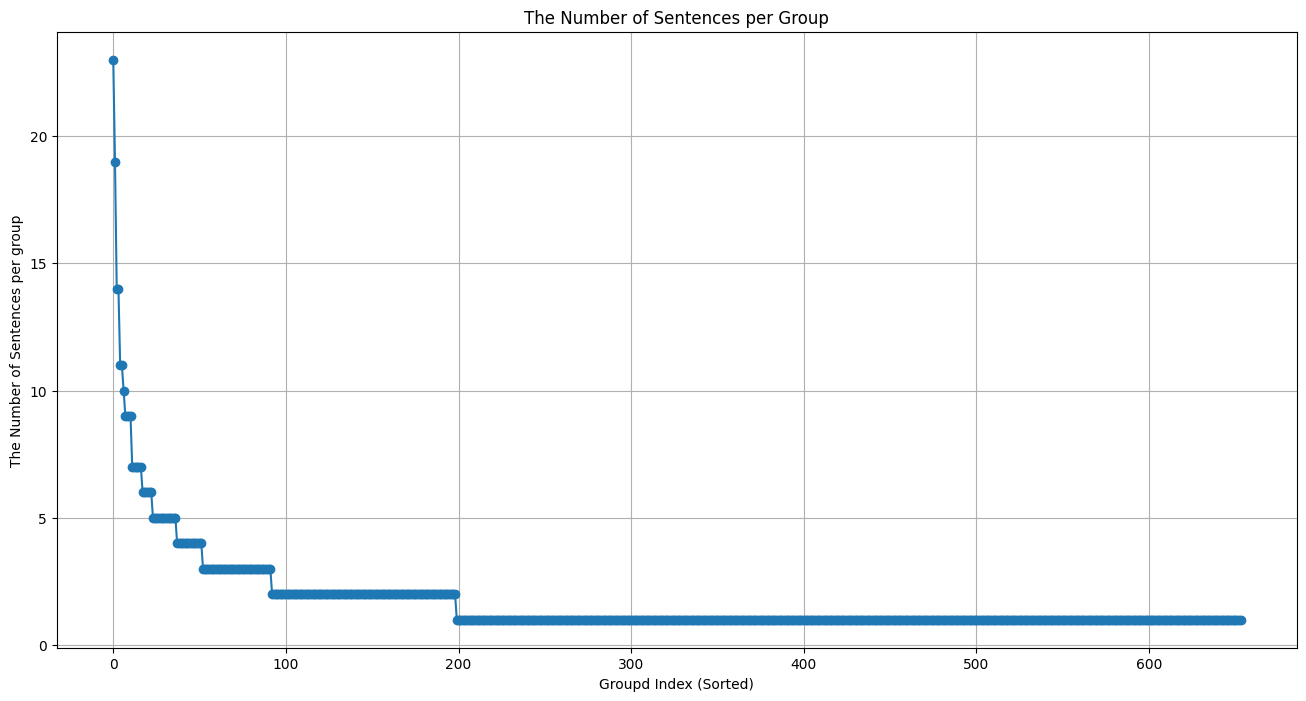

In [ ]:
# Rearrange them, and plot the count in y-axis and matrix index in the x-axis.
import matplotlib.pyplot as plt

# rearrange in decreaing order (ranking)
sorted_indices = np.argsort(-group_counts_vector)
sorted_sent_counts = group_counts_vector[sorted_indices]

# x-axis
plt.figure(figsize=(16,8))
plt.plot(range(len(sorted_sent_counts)), sorted_sent_counts, marker='o', linestyle="-")


plt.xlabel("Groupd Index (Sorted)")
plt.ylabel("The Number of Sentences per group")
plt.title("The Number of Sentences per Group")
plt.grid(True)

plt.show()

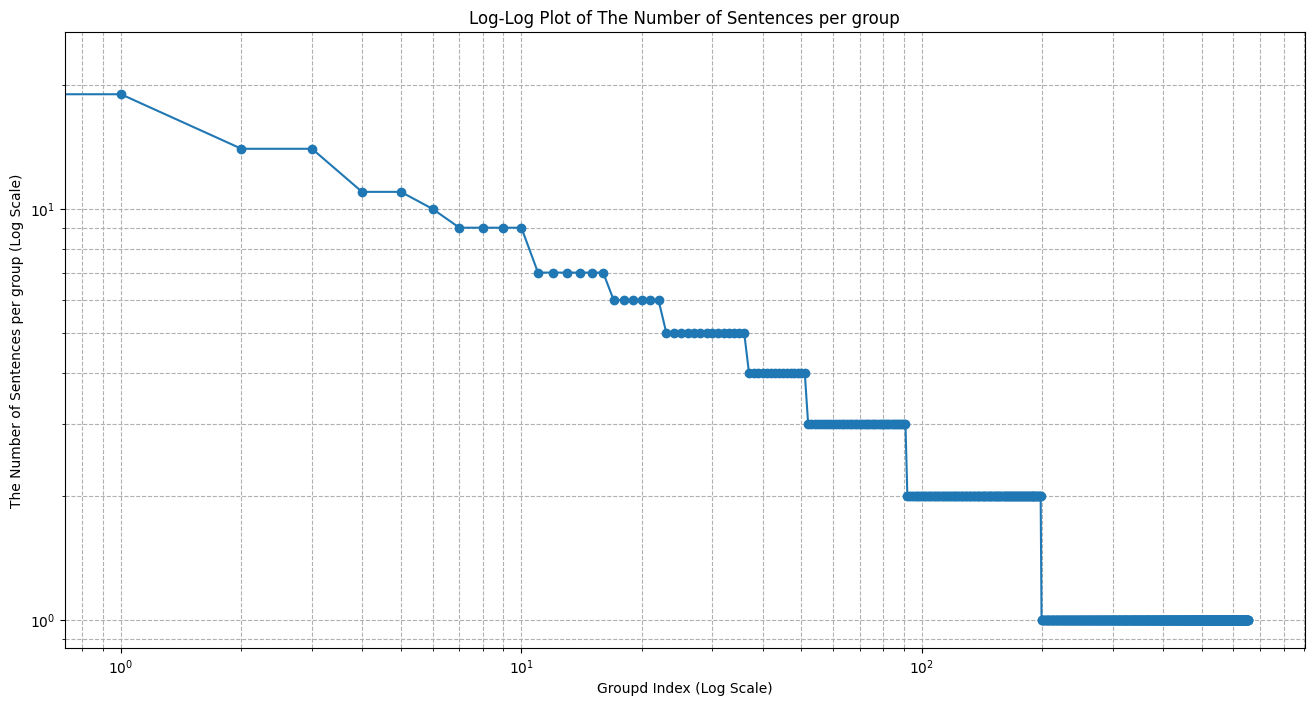

In [ ]:
# Also plot the log log plot using the count matrix.

plt.figure(figsize=(16,8))
plt.loglog(range(len(sorted_sent_counts)), sorted_sent_counts, marker="o", linestyle="-")

plt.xlabel("Groupd Index (Log Scale)")
plt.ylabel("The Number of Sentences per group (Log Scale)")
plt.title("Log-Log Plot of The Number of Sentences per group")
plt.grid(True, which="both", linestyle="--")

plt.show()

## Linear Regression Analysis
- Build equation: y = ax + b
- Check power-law distribution

In [ ]:
from scipy.stats import linregress

def linear_regression(counts):
  x = np.log10(np.arange(1, len(sorted_sent_counts)+1))
  y = np.log10(sorted_sent_counts)

  # linear regression
  slope, intercept, r_val, p_val, std_err = linregress(x, y)

  # regression prediction
  y_pred = slope * x + intercept

  return x, y, slope, intercept, r_val, p_val, y_pred

In [ ]:
x, y, slope, intercept, r_val, p_val, y_pred = linear_regression(sorted_sent_counts)

In [ ]:
print("Linear Regression Prediction: y = slope * x + intercept")
print(f"y ={slope:.2f}x + {intercept:.2f}")

Linear Regression Prediction: y = slope * x + intercept
y =-0.55x + 1.44


In [ ]:
print(f"Linear Regression Results:")
print(f"   - Slope: {slope:.4f}")
print(f"   - Intercept: {intercept:.4f}")
print(f"   - R-squared: {r_val**2:.4f}")
print(f"   - P-value: {p_val:.4e}")

Linear Regression Results:
   - Slope: -0.5466
   - Intercept: 1.4433
   - R-squared: 0.9048
   - P-value: 0.0000e+00


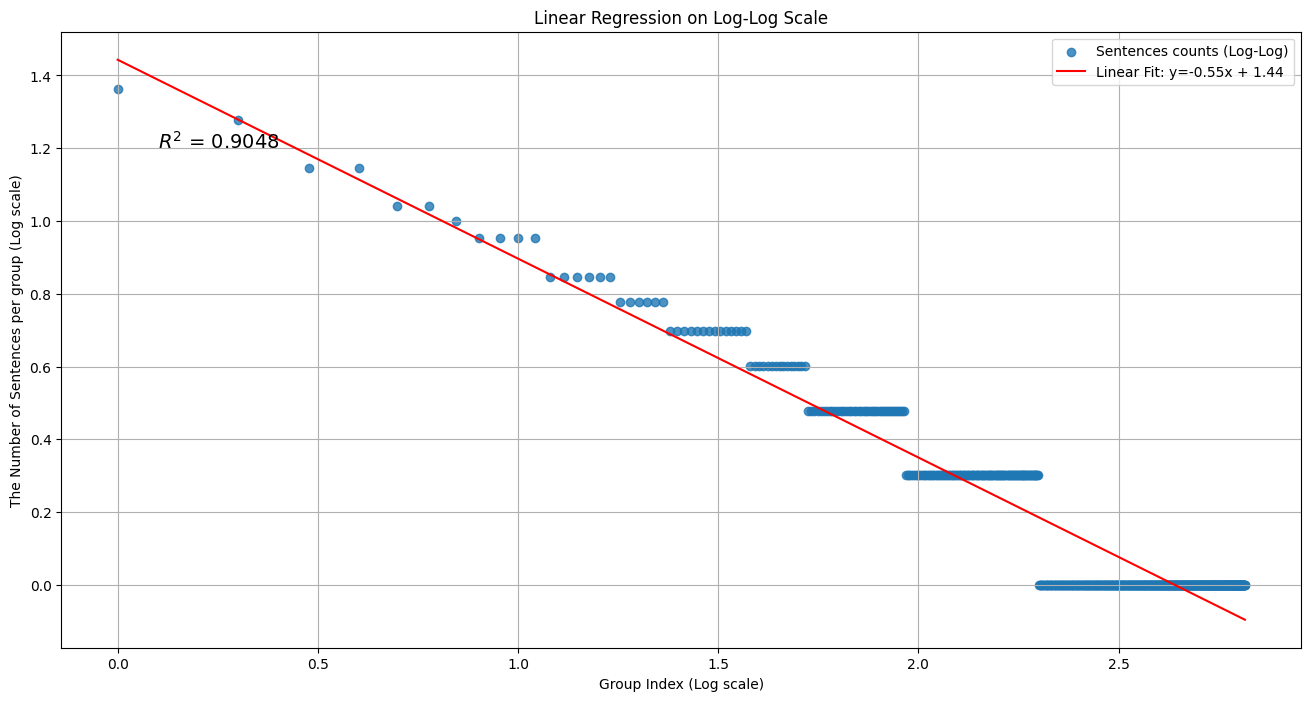

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(x, y, label="Sentences counts (Log-Log)", alpha=0.8, marker="o")
plt.plot(x, y_pred, color = "red", label=f"Linear Fit: y={slope:.2f}x + {intercept:.2f}")
plt.text(0.1, 1.2, f"$R^2$ = {r_val**2:.4f}", fontsize=14, color="black")

plt.xlabel("Group Index (Log scale)")
plt.ylabel("The Number of Sentences per group (Log scale)")
plt.title("Linear Regression on Log-Log Scale")
plt.legend()
plt.grid(True)

plt.show()

### Analysis
Initially, I used only SBERT for embedding and grouped sentences based on a cosine similarity threshold of 0.9. However, each sentence was assigned to its own group, meaning that no two sentences had a cosine similarity of 0.9 or higher.

This initially led me to suspect that the issue might be related to the embedding model. To verify this, I compared the results using two different embedding models, but both models produced similar outcomes—each group contained approximately one sentence.

Based on this, it seems that the issue is not with the embedding model but rather with the dataset itself.